# MAGMA experimnetations

## Artificial data : Common HP + Uncommon grid

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from MAGMA import MAGMA

In [2]:
N = 200
M = 5

t0 = 0
tN = 10 + 1e-3

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(200,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
m0_function = lambda t : a * t + b
print(m0.shape)

(200,)


In [4]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[15.02351985  2.6307119 ]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(200, 200)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(200,)


In [7]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[139.0898916    3.53794593]
0.7900264664444736


In [8]:
Ni = 30

T = np.zeros((M, Ni))
Y = np.zeros((M, Ni))

for i in range(M):
    Ti = np.sort(np.random.choice(common_T, size=Ni, replace=False))
    mask = np.isin(common_T, Ti)

    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, Ti)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(Ni)

    mu0_i = mu0[mask]
    Yi = np.random.multivariate_normal(mu0_i, Psi_Theta_Sigma)

    T[i] = Ti
    Y[i] = Yi


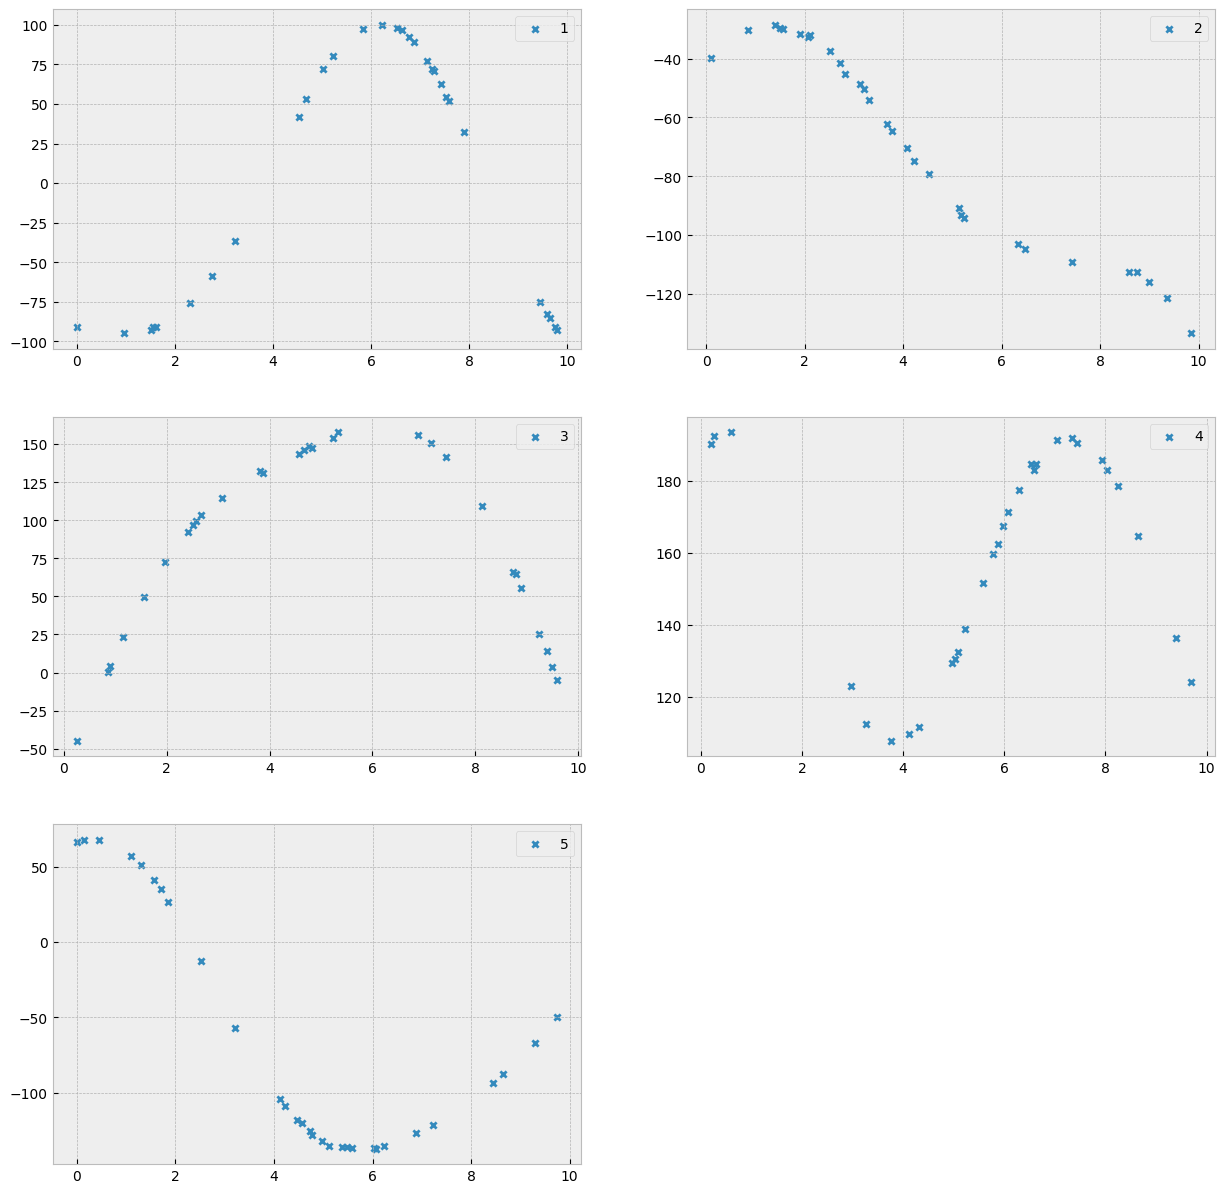

In [9]:
plt.figure(figsize=(15, int(np.ceil(M/2)) * 5))
for i in range(1, M + 1):
    plt.subplot(int(np.ceil(M/2)), 2, i)
    plt.scatter(T[i-1], Y[i - 1], label=f"{i}", s=20, marker='x')
    plt.legend()
plt.show()

In [10]:
model = MAGMA(
    T=T,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    m0_function=m0_function,
    theta0=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Theta=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Sigma=np.random.uniform(0, 1),
    common_hp_flag=True,
    common_grid_flag=False,
    save_history_flag=True,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [11]:
model.Y_normalized.shape

(5, 200)

In [12]:
model.T[0]

array([0.        , 0.95486935, 1.50768844, 1.55794472, 1.60820101,
       2.31178894, 2.76409548, 3.21640201, 4.52306533, 4.67383417,
       5.02562814, 5.22665327, 5.82972864, 6.23177889, 6.53331658,
       6.63382915, 6.78459799, 6.88511055, 7.13639196, 7.23690452,
       7.2871608 , 7.43792965, 7.53844221, 7.58869849, 7.89023618,
       9.4481809 , 9.59894975, 9.64920603, 9.74971859, 9.79997487])

In [13]:
model.common_T

array([ 0.        ,  0.05025628,  0.10051256,  0.15076884,  0.20102513,
        0.25128141,  0.30153769,  0.35179397,  0.40205025,  0.45230653,
        0.50256281,  0.5528191 ,  0.60307538,  0.65333166,  0.70358794,
        0.75384422,  0.8041005 ,  0.85435678,  0.90461307,  0.95486935,
        1.00512563,  1.05538191,  1.10563819,  1.15589447,  1.20615075,
        1.25640704,  1.30666332,  1.3569196 ,  1.40717588,  1.45743216,
        1.50768844,  1.55794472,  1.60820101,  1.65845729,  1.70871357,
        1.75896985,  1.80922613,  1.85948241,  1.90973869,  1.95999497,
        2.01025126,  2.06050754,  2.11076382,  2.1610201 ,  2.21127638,
        2.26153266,  2.31178894,  2.36204523,  2.41230151,  2.46255779,
        2.51281407,  2.56307035,  2.61332663,  2.66358291,  2.7138392 ,
        2.76409548,  2.81435176,  2.86460804,  2.91486432,  2.9651206 ,
        3.01537688,  3.06563317,  3.11588945,  3.16614573,  3.21640201,
        3.26665829,  3.31691457,  3.36717085,  3.41742714,  3.46

In [14]:
model.T_masks[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.])

In [15]:
model.Y[0]

array([-90.72544063, -95.00071744, -93.11331963, -91.01141899,
       -90.64766102, -75.98529993, -58.46399825, -36.48103691,
        41.68245974,  53.08233697,  71.83148403,  80.55453291,
        97.62732319, 100.17298218,  97.7628382 ,  96.59307814,
        92.33686861,  88.88142015,  77.28347812,  72.09820015,
        70.96677942,  62.54992927,  54.22595521,  51.65351286,
        32.39056602, -74.96654608, -82.81892088, -85.2475052 ,
       -90.75475497, -92.96100325])

In [16]:
model.Y_normalized[0]

array([-90.72544063,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , -95.00071744,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , -93.11331963, -91.01141899,
       -90.64766102,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , -75.98529993,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , -58.46399825,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [17]:
model.fit(max_iterations=1, eps=-np.inf)

MAGMA Training:   0%|          | 0/1 [00:00<?, ?it/s]

theta0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09220D+03    |proj g|=  1.17830D+01

At iterate    1    f= -1.10173D+03    |proj g|=  7.74917D+00


 This problem is unconstrained.



At iterate    2    f= -1.11271D+03    |proj g|=  4.21888D+00

At iterate    3    f= -1.12024D+03    |proj g|=  2.52127D+00

At iterate    4    f= -1.12684D+03    |proj g|=  1.46466D+00

At iterate    5    f= -1.13221D+03    |proj g|=  8.32327D-01

At iterate    6    f= -1.13676D+03    |proj g|=  4.72995D-01

At iterate    7    f= -1.14098D+03    |proj g|=  2.79349D-01

At iterate    8    f= -1.14620D+03    |proj g|=  1.38268D-01

At iterate    9    f= -1.14631D+03    |proj g|=  4.46953D-02

At iterate   10    f= -1.14652D+03    |proj g|=  4.95502D-02

At iterate   11    f= -1.14702D+03    |proj g|=  7.21806D-02

At iterate   12    f= -1.14833D+03    |proj g|=  1.85118D-02

At iterate   13    f= -1.14997D+03    |proj g|=  1.51063D-02

At iterate   14    f= -1.14997D+03    |proj g|=  1.52300D-02
  ys=-1.940E-07  -gs= 9.779E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -1.14997D+03    |proj g|=  1.31701D-02

At iterate   16    f= -1.14997D+03    |proj g|=  1.07979D-02

At iterate   17    f= -1.14997D+03    |proj g|=  1.11985D-02
  ys=-3.745E-08  -gs= 1.012E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   18    f= -1.14997D+03    |proj g|=  1.09610D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19    126      4     2     0   1.096D-02  -1.150D+03
  F =  -1149.9688053503846     

ABNORMAL_TERMINATION_IN_LNSRCH                              

Theta & Sigma
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.47325D+03    |proj g|=  1.55773D+10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
MAGMA Training: 100%|██████████| 1/1 [00:10<00:00, 10.84s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   1.558D+10  -4.473D+03
  F =  -4473.2533352645432     

ABNORMAL_TERMINATION_IN_LNSRCH                              


In [18]:
model.scipy_optimize_display = False
model.fit(max_iterations=49, eps=-np.inf)

MAGMA Training:   2%|▏         | 1/49 [00:30<24:20, 30.44s/it]


KeyboardInterrupt: 

In [ ]:
history = model.history
len(history)

51

In [ ]:
LL_theta0 = []
LL_Theta_Sigma = []

for epoch_history in history[1:]:
    LL_theta0.append(epoch_history["LL_theta0"])
    LL_Theta_Sigma.append(epoch_history["LL_Theta_Sigma"])

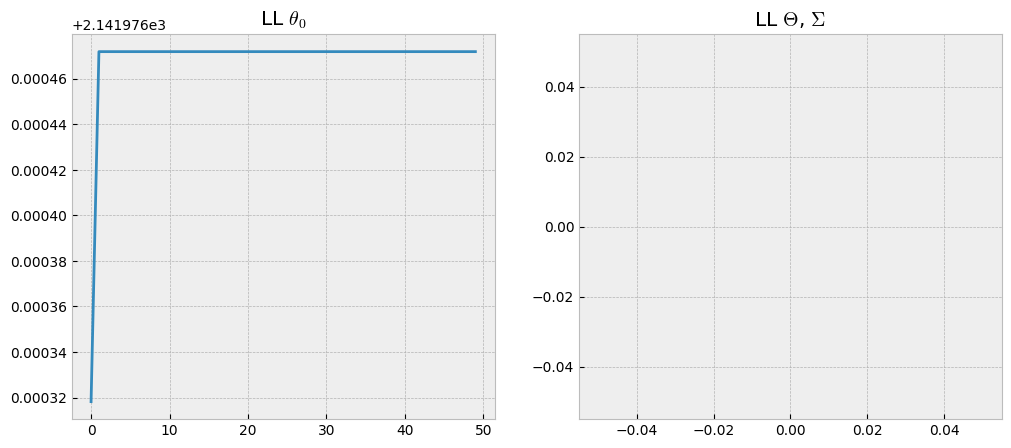

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LL_theta0)
plt.title("LL $\\theta_0$")
plt.subplot(1, 2, 2)
plt.plot(LL_Theta_Sigma)
plt.title("LL $\Theta$, $\Sigma$")
plt.show()

In [ ]:
Sigma = []
for epoch_history in history:
    Sigma.append(epoch_history["Sigma"])

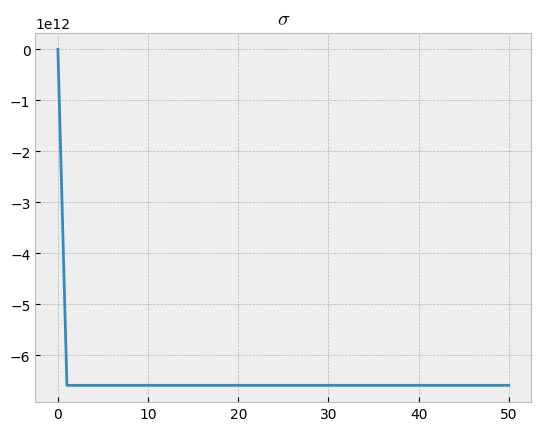

In [ ]:
plt.plot(Sigma)
plt.title("$\sigma$")
plt.show()

In [ ]:
m0_estim_norms = []
for epoch_history in history[1:]:
    m0_estim_norms.append(np.linalg.norm(epoch_history["m0"]))

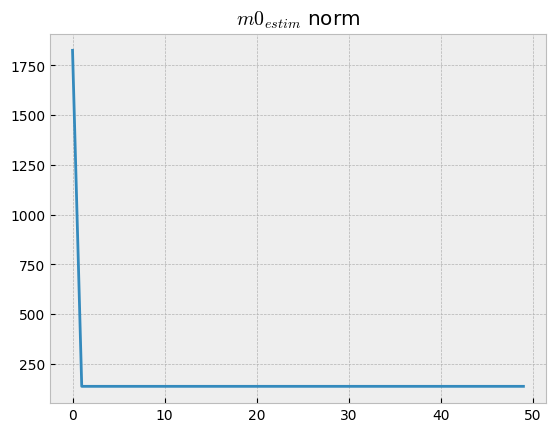

In [ ]:
plt.plot(m0_estim_norms)
plt.title("$m0_{estim}$ norm")
plt.show()

In [ ]:
theta0 = []
for epoch_history in history:
    theta0.append(epoch_history["theta0"])
theta0 = np.array(theta0)
print(model.theta0)

[64.2332537   1.96030608]


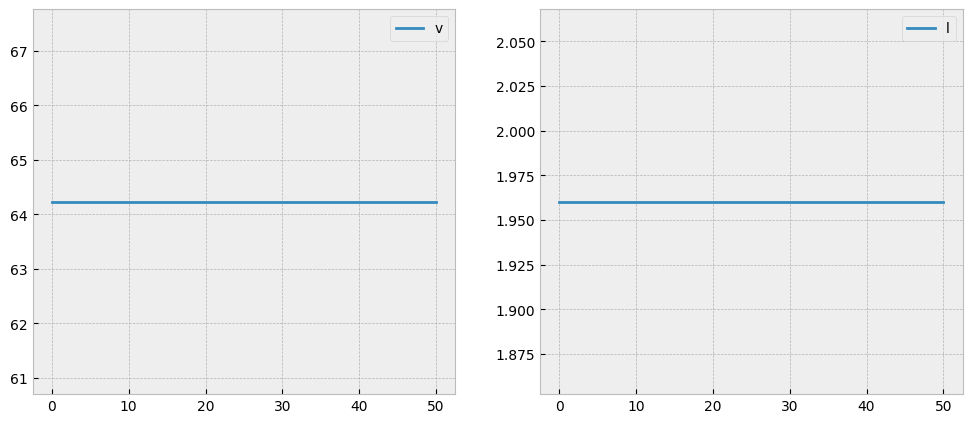

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0[:, 0], label="v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(theta0[:, 1], label="l")
plt.legend()
plt.show()

In [ ]:
Theta = []
for epoch_history in history:
    Theta.append(epoch_history["Theta"])
Theta = np.array(Theta)
print(model.Theta)

[-2.98423876e+12 -2.94687953e+14]


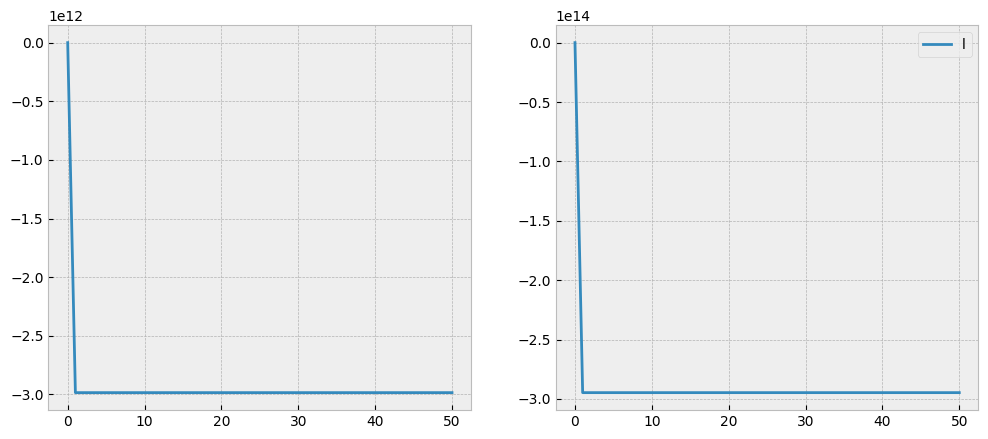

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Theta[:, 0], label="v")
plt.subplot(1, 2, 2)
plt.plot(Theta[:, 1], label="l")
plt.legend()
plt.show()